In [1]:
import etl
import models
import plots
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
model = models.Models()

input_file = 'data/full_data_with_timestamp.csv'

train_set, train_labels, valid_set, valid_labels = etl.process_input(input_file)

train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
blueChampionKill,258224.0,0.782565,0.679202,0.000000,0.200000,0.600000,1.200000,4.950000
blueFirstBlood,258224.0,0.481113,0.499644,0.000000,0.000000,0.000000,1.000000,1.000000
redChampionKill,258224.0,0.769928,0.676865,0.000000,0.200000,0.600000,1.150000,4.750000
timeElapsedMS,258224.0,18.396547,11.214036,0.338567,8.579450,16.285608,27.260121,67.351000
blueHasDragonSoul,258224.0,0.037092,0.188987,0.000000,0.000000,0.000000,0.000000,1.000000
percentMinionDiff,258224.0,-0.003441,0.091520,-0.923077,-0.050000,0.000000,0.042994,0.916667
percentJungleMinionDiff,258224.0,-0.006463,0.170827,-0.992908,-0.106061,0.000000,0.090226,0.994565
percentAvgLevelDiff,258224.0,-0.000684,0.037531,-0.333333,-0.024390,0.000000,0.023810,0.259259
percentTotalGoldDiff,258224.0,0.000734,0.078605,-0.454918,-0.052190,0.000000,0.053696,0.373846
heraldKillDiff,258224.0,0.096002,1.094477,-2.000000,0.000000,0.000000,1.000000,2.000000


In [3]:

model.train(train_set, train_labels)

Epoch 1/30
4035/4035 [==============================] - 92s 22ms/step - loss: 0.4640 - binary_accuracy: 0.7681
Epoch 2/30
4035/4035 [==============================] - 89s 22ms/step - loss: 0.4510 - binary_accuracy: 0.7728
Epoch 3/30
4035/4035 [==============================] - 88s 22ms/step - loss: 0.4461 - binary_accuracy: 0.7736
Epoch 4/30
4035/4035 [==============================] - 91s 23ms/step - loss: 0.4427 - binary_accuracy: 0.7741
Epoch 5/30
4035/4035 [==============================] - 90s 22ms/step - loss: 0.4407 - binary_accuracy: 0.7752
Epoch 6/30
4035/4035 [==============================] - 89s 22ms/step - loss: 0.4402 - binary_accuracy: 0.7750
Epoch 7/30
4035/4035 [==============================] - 90s 22ms/step - loss: 0.4396 - binary_accuracy: 0.7754
Epoch 8/30
4035/4035 [==============================] - 79s 20ms/step - loss: 0.4388 - binary_accuracy: 0.7755
Epoch 9/30
4035/4035 [==============================] - 78s 19ms/step - loss: 0.4390 - binary_accuracy: 0.7754
E

In [4]:

model.evaluate(valid_set, valid_labels)

 759/2018 [==========>...................] - ETA: 3s - loss: 0.4196 - binary_accuracy: 0.7838

2018/2018 [==============================] - 6s 3ms/step - loss: 0.4204 - binary_accuracy: 0.7829
XGB accuracy:  0.7779447301567631
Logistic regression accuracy:  0.7786263089410744
SGD accuracy:  0.7746917405043683


2018/2018 [==============================] - 6s 3ms/step


<Axes: >

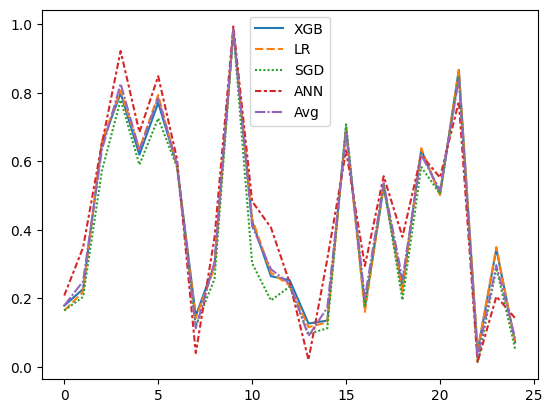

In [3]:


predictions = model.predict(valid_set)

sns.lineplot(data=predictions.iloc[:25])

,XGB,LR,SGD,ANN,Avg
count,64556.000000,64556.000000,64556.000000,6.455600e+04,64556.000000
mean,0.504976,0.505017,0.485830,5.215896e-01,0.504353
std,0.316507,0.321079,0.321568,3.208966e-01,0.317546
min,0.000230,0.000174,0.000109,3.852661e-08,0.000131
25%,0.210881,0.202477,0.182324,2.472733e-01,0.212332
50%,0.524365,0.525877,0.499797,5.526465e-01,0.527200
75%,0.797721,0.806162,0.777315,7.976595e-01,0.793352
max,0.999936,0.999960,0.999934,1.000000e+00,0.999957


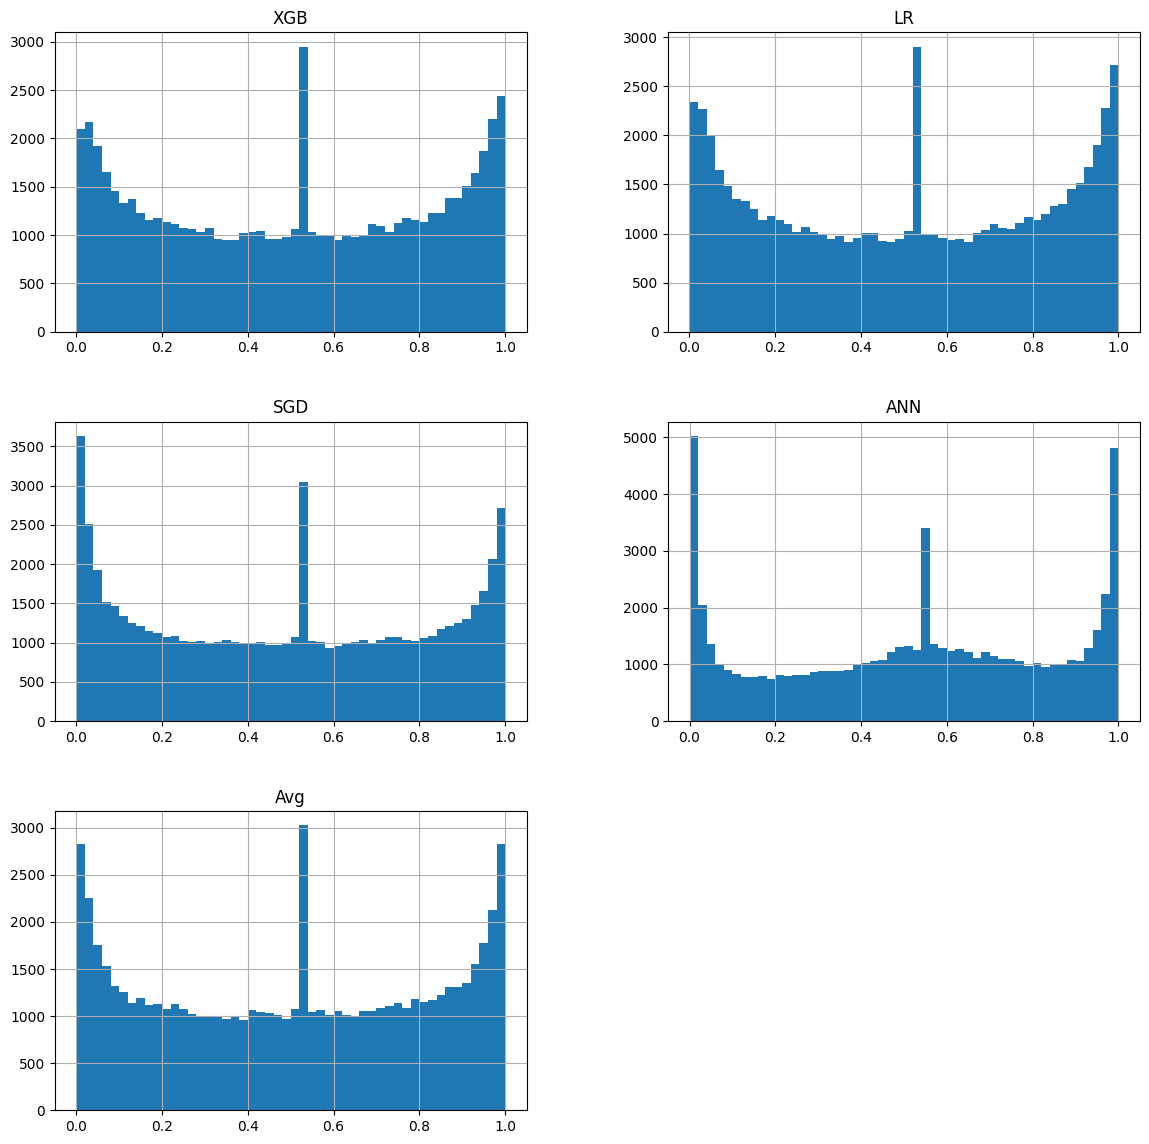

In [7]:
predictions.hist(bins=50, figsize=(14,14))
predictions.describe()

<Axes: ylabel='Count'>

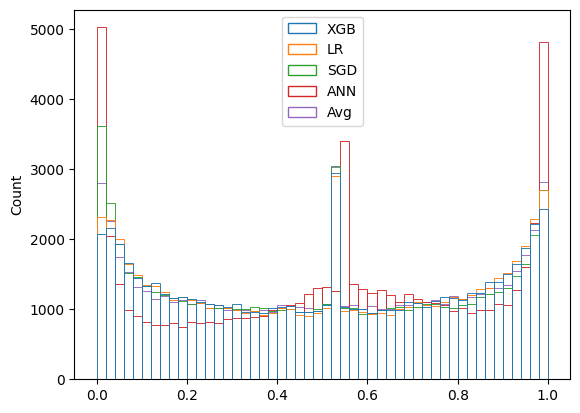

In [10]:
sns.histplot(data=predictions, fill=False, multiple='layer', bins=50)

In [4]:
wins = valid_labels.copy()
wins.reset_index(inplace=True, drop=True)
wins.head()

0    1
1    0
2    0
3    1
4    0
Name: blueWin, dtype: int64

In [5]:
import pandas as pd

pred_with_labels = predictions.copy()

pred_with_labels['wins'] = wins
pred_with_labels.head()

,XGB,LR,SGD,ANN,Avg,wins
0,0.178703,0.164284,0.164444,0.208065,0.178874,1
1,0.226795,0.219195,0.203881,0.348159,0.249507,0
2,0.650549,0.657702,0.571753,0.650931,0.632734,0
3,0.799018,0.806592,0.779164,0.922352,0.826782,1
4,0.619624,0.635971,0.590142,0.684871,0.632652,0


<Axes: >

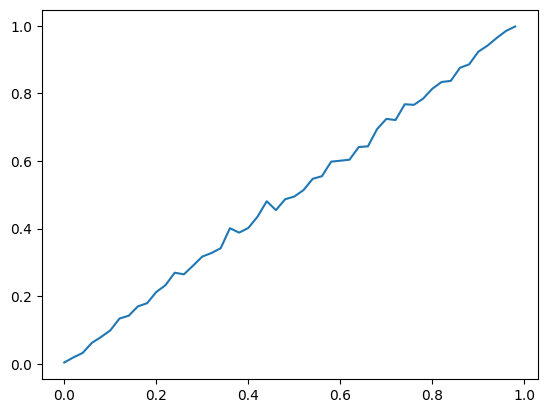

In [6]:
n_bins = 50
xgb_input = pred_with_labels[["XGB", "wins"]].values.tolist()

bin_width = 1 / n_bins

x_vals = [i*bin_width for i in range(n_bins)]
y_vals = plots.get_win_percent(n_bins, xgb_input)



sns.lineplot(x=x_vals, y=y_vals)

<Axes: >

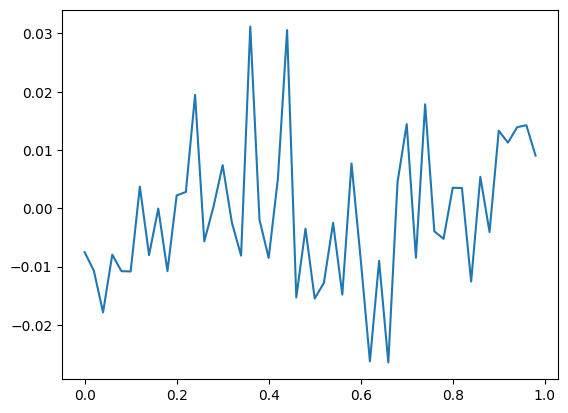

In [7]:
y_expected = plots.get_bin_centers(n_bins, xgb_input)
diff = [y_vals[i] - y_expected[i] for i in range(n_bins)]
sns.lineplot(x=x_vals, y=diff)

<Axes: ylabel='Count'>

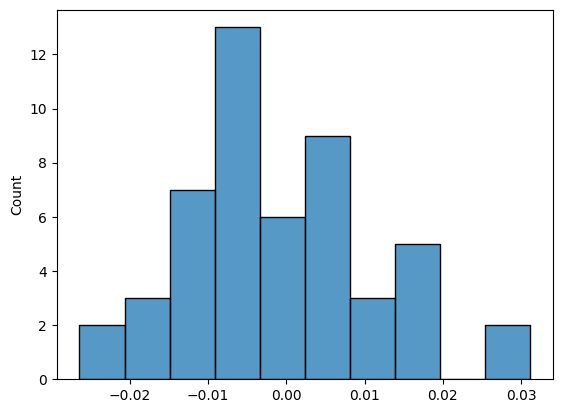

In [9]:
sns.histplot(data=diff, fill=True, bins=10)